<a href="https://colab.research.google.com/github/nimratmann/SBU_Sports/blob/main/SBU_Sports.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Set Up My Environment

### Install Required Libraries

In [1]:
!pip install mysql-connector-python pandas matplotlib seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 21.8 MB/s eta 0:00:00


### Import Libraries

In [2]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Connect to My MySQL Database

### Database Connection

In [9]:
# Define connection details
username = 'student_athletics'
password = 'Ahi2024!!'
host = 'shtm-fallprev.mysql.database.azure.com'
database = 'sbu_athletics'

# Establish the connection
conn = mysql.connector.connect(
    user=username,
    password=password,
    host=host,
    database=database
)
cursor = conn.cursor()

# Step 3: Retrieve Data from SQL Tables

### Fetch Data

In [11]:
# Query players table
players_query = "SELECT * FROM players WHERE sbuid IS NOT NULL"
cursor.execute(players_query)
players_data = cursor.fetchall()
players_df = pd.DataFrame(players_data, columns=[i[0] for i in cursor.description])


In [12]:
# Query vald table
vald_query = "SELECT * FROM vald"
cursor.execute(vald_query)
vald_data = cursor.fetchall()
vald_df = pd.DataFrame(vald_data, columns=[i[0] for i in cursor.description])

# Step 4: Inspect Column Names

In [17]:
# Display the first few rows and column names of each dataframe
print("Players DataFrame")
print(players_df.head())
print(players_df.columns)

Players DataFrame
            name        sbuid        sbu_sport sbu_firstname sbu_lastname  \
0  aaliyah jones  114815105.0        Womes Lax      Aaliyah         Jones   
1   aaron clarke  115338241.0  Mens Basketball        Aaron        Clarke   
2   aaron clarke  115338241.0  Mens Basketball        Aaron        Clarke   
3   aaron clarke  115338241.0  Mens Basketball        Aaron        Clarke   
4   aaron clarke  115338241.0  Mens Basketball        Aaron        Clarke   

    source                                    id                     teams  \
0  hawkins                  JHOQuvm0VoaPMLoIav2E  ['UXZ8OLGxGhvgbRewJ2qN']   
1  hawkins                  29iSAPwOLe7R2WR6v8jD  ['2HwPMz383lpPvCUplpC6']   
2     vald  399c123b-dad4-4e0d-8d03-72094c08d3d0                      ['']   
3  kinexon                                    62                      ['']   
4     vald  07376d05-4a93-4a89-bdf7-7926d7c694e1                      ['']   

                                             group

In [18]:
# Display the first few rows and column names of each dataframe
print("\nVald DataFrame")
print(vald_df.head())
print(vald_df.columns)


Vald DataFrame
         sbuid    sbu_sport                             athleteId  \
0  115748989.0  Mens Soccer  d82c8cdb-8d4d-40ad-a02e-00386c4e7510   
1  115748989.0  Mens Soccer  d82c8cdb-8d4d-40ad-a02e-00386c4e7510   
2  115748989.0  Mens Soccer  d82c8cdb-8d4d-40ad-a02e-00386c4e7510   
3  115748989.0  Mens Soccer  d82c8cdb-8d4d-40ad-a02e-00386c4e7510   
4  115748989.0  Mens Soccer  d82c8cdb-8d4d-40ad-a02e-00386c4e7510   

                                 testId               modifiedUtc  \
0  d1dc8b4b-f563-412b-aaa8-100f295b044a  2022-01-10T17:18:51.241Z   
1  d1dc8b4b-f563-412b-aaa8-100f295b044a  2022-01-10T17:18:51.241Z   
2  d1dc8b4b-f563-412b-aaa8-100f295b044a  2022-01-10T17:18:51.241Z   
3  d1dc8b4b-f563-412b-aaa8-100f295b044a  2022-01-10T17:18:51.241Z   
4  d1dc8b4b-f563-412b-aaa8-100f295b044a  2022-01-10T17:18:51.241Z   

                testDateUtc           metric        value  
0  2022-01-10T17:10:56.344Z     leftAvgForce   418.250000  
1  2022-01-10T17:10:56.344Z      l

# Step 5: Merge DataFrames

### Merge DataFrames on Player ID


In [19]:
# Merge dataframes on 'sbuid'
merged_df = players_df.merge(vald_df, on='sbuid')

# Display the merged dataframe
print("Merged DataFrame")
print(merged_df.head())


Merged DataFrame
           name        sbuid      sbu_sport_x sbu_firstname sbu_lastname  \
0  aaron clarke  115338241.0  Mens Basketball        Aaron        Clarke   
1  aaron clarke  115338241.0  Mens Basketball        Aaron        Clarke   
2  aaron clarke  115338241.0  Mens Basketball        Aaron        Clarke   
3  aaron clarke  115338241.0  Mens Basketball        Aaron        Clarke   
4  aaron clarke  115338241.0  Mens Basketball        Aaron        Clarke   

    source                    id                     teams groups group_names  \
0  hawkins  29iSAPwOLe7R2WR6v8jD  ['2HwPMz383lpPvCUplpC6']     []          []   
1  hawkins  29iSAPwOLe7R2WR6v8jD  ['2HwPMz383lpPvCUplpC6']     []          []   
2  hawkins  29iSAPwOLe7R2WR6v8jD  ['2HwPMz383lpPvCUplpC6']     []          []   
3  hawkins  29iSAPwOLe7R2WR6v8jD  ['2HwPMz383lpPvCUplpC6']     []          []   
4  hawkins  29iSAPwOLe7R2WR6v8jD  ['2HwPMz383lpPvCUplpC6']     []          []   

                          team_names  \

In [22]:
# Display the column names of the merged dataframe
print("Columns in merged_df:")
print(merged_df.columns)

Columns in merged_df:
Index(['name', 'sbuid', 'sbu_sport_x', 'sbu_firstname', 'sbu_lastname',
       'source', 'id', 'teams', 'groups', 'group_names', 'team_names',
       'endpointURL', 'sbu_sport_y', 'athleteId', 'testId', 'modifiedUtc',
       'testDateUtc', 'metric', 'value'],
      dtype='object')


# Step 6: Exploratory Data Analysis (EDA)

### Descriptive Statistics

In [24]:
# Display data types to identify numeric columns
print("Data types in merged_df:")
print(merged_df.dtypes)

Data types in merged_df:
name              object
sbuid            float64
sbu_sport_x       object
sbu_firstname     object
sbu_lastname      object
source            object
id                object
teams             object
groups            object
group_names       object
team_names        object
endpointURL       object
sbu_sport_y       object
athleteId         object
testId            object
modifiedUtc       object
testDateUtc       object
metric            object
value            float64
dtype: object


In [25]:
# Select only numeric columns for aggregation
numeric_columns = merged_df.select_dtypes(include='number').columns
performance_stats = merged_df.groupby('sbu_sport_x')[numeric_columns].agg(['mean', 'std', 'count'])
print(performance_stats)

                          sbuid                             value  \
                           mean           std  count         mean   
sbu_sport_x                                                         
Baseball           1.138970e+08  1.010740e+06   6564   620.012308   
Football           1.131105e+08  1.344531e+07  26352  1033.771546   
Mens Basketball    1.150574e+08  7.461613e+05   5592   918.291438   
Mens Lax           1.142774e+08  9.650091e+05   5328   829.267787   
Mens Soccer        1.149533e+08  8.143485e+05  11040   950.011315   
Softball           1.146020e+08  7.678147e+05   1764   593.175695   
Swim               1.148304e+08  1.913942e+04     48   229.412418   
Tennis             1.150009e+08  4.157757e+05    840   499.079828   
Track and Field    1.142580e+08  8.299490e+05   2748   786.174008   
Womens Basketball  1.147974e+08  9.918121e+05   7260   636.003182   
Womens Soccer      1.171462e+08  1.227066e+07  13272   713.567526   
Womens Volleyball  1.144855e+08  9

### Visualization Examples


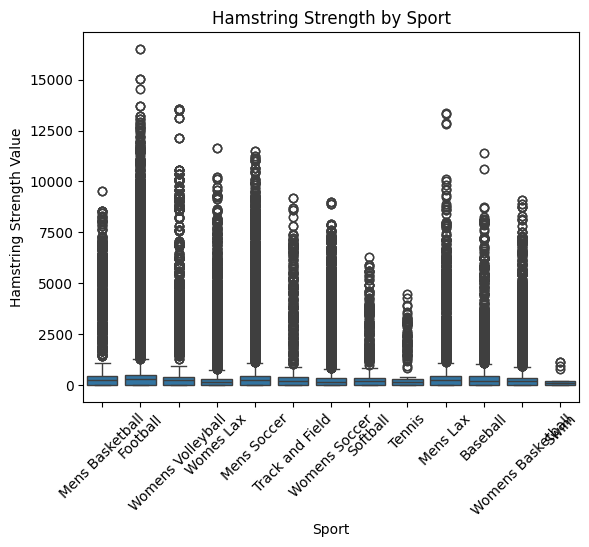

In [26]:
# Boxplot of hamstring strength by sport
sns.boxplot(x='sbu_sport_x', y='value', data=merged_df)
plt.title('Hamstring Strength by Sport')
plt.xlabel('Sport')
plt.ylabel('Hamstring Strength Value')
plt.xticks(rotation=45)
plt.show()

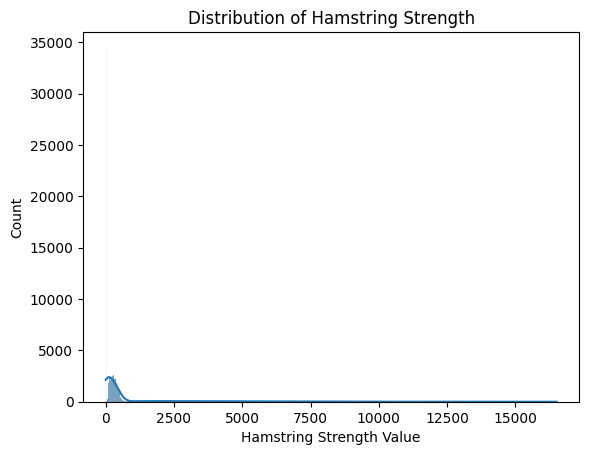

In [27]:
# Distribution of hamstring strength
sns.histplot(merged_df['value'], kde=True)
plt.title('Distribution of Hamstring Strength')
plt.xlabel('Hamstring Strength Value')
plt.show()

### Correlation Analysis

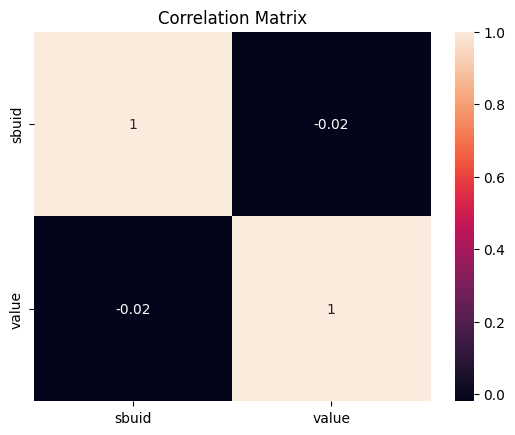

In [31]:
# Correlation Analysis

correlation_matrix = merged_df[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

### Injury Risk Assessment

In [29]:
# Injury risk assessment

low_strength_threshold = merged_df['value'].quantile(0.25)
at_risk_players = merged_df[merged_df['value'] < low_strength_threshold]

In [30]:
# Analysis of at-risk players by sport and group

at_risk_stats = at_risk_players.groupby(['sbu_sport_x', 'groups']).size().reset_index(name='count')
print(at_risk_stats)

          sbu_sport_x                                             groups  \
0            Baseball                                               ['']   
1            Baseball           ['50f7e35e-1643-4d6d-8c04-1cb4b7e677d5']   
2            Baseball           ['57f3387f-e153-4831-a314-545f3360cd8e']   
3            Baseball           ['761ca313-599e-4aa7-9fc2-07d9c0be999e']   
4            Baseball  ['CvYUXzIdaUQkeWIIy70f', 'i6fwTRUKaEA2WzXFVmfn...   
..                ...                                                ...   
73  Womens Volleyball                                                 []   
74          Womes Lax                                               ['']   
75          Womes Lax           ['57f3387f-e153-4831-a314-545f3360cd8e']   
76          Womes Lax   ['dfoEopLdUTNOpj9PLXzV', 'mpDEWDC0BUN7iGScM7RL']   
77          Womes Lax                                                 []   

    count  
0     228  
1      76  
2      76  
3     362  
4      20  
..    ...  
73 